# tools.ipynb
This module contains tools that are used in whole work.

In [23]:
import pandas as pd

def get_data(file:str = "Air_Quality.csv"):
    '''This function reads the data from the csv file and returns it as a pandas dataframe.'''
    data = pd.read_csv(file)
    return data

def get_clean_data(file:str = "Air_Quality.csv"):
    '''This function reads the data from get_data function, cleans it, and returns it as a pandas dataframe.'''
    data = get_data(file)
    clean_data = data.drop(columns=['Message'])
    clean_data = clean_data.dropna(subset=['Geo Join ID', 'Geo Place Name'])
    clean_data['Start_Date'] = pd.to_datetime(clean_data['Start_Date'])

    return clean_data

In [24]:
data = get_clean_data('Air_Quality.csv')
path = 'Air_Quality.csv'

In [25]:

def get_top_pollutants(data, top_n=10):
    """
    Get the top N most common air pollutants from the given dataset.

    Parameters:
    data (DataFrame): The input DataFrame containing air pollutant data.
    top_n (int): The number of top pollutants to return. Default is 10.

    Returns:
    DataFrame: A DataFrame containing the top N most common air pollutants.
    """
    pollutant_counts = data.groupby('Name').size().reset_index(name='Count')
    most_common_pollutants = pollutant_counts.sort_values(by='Count', ascending=False)
    return most_common_pollutants.head(top_n)

In [26]:
get_top_pollutants(data=data)

,Name,Count
13,Nitrogen dioxide (NO2),5922
12,Fine particles (PM 2.5),5922
16,Ozone (O3),2115
3,Asthma emergency department visits due to PM2.5,480
4,Asthma emergency departments visits due to Ozone,480
5,Asthma hospitalizations due to Ozone,480
0,Annual vehicle miles traveled,321
2,Annual vehicle miles traveled (trucks),321
1,Annual vehicle miles traveled (cars),321
11,Deaths due to PM2.5,240


In [27]:
def plot_top_pollutants(data_path, top_n=10):
    """
    Plot the top N most common air pollutants from the given dataset.

    Parameters:
    data_path (str): The file path to the input CSV file containing air pollutant data.
    top_n (int): The number of top pollutants to display in the plot. Default is 10.
    """

    data = get_clean_data(data_path)
    

    most_common_pollutants = get_top_pollutants(data, top_n=top_n)

    most_common_pollutants['ShortName'] = most_common_pollutants['Name'].apply(lambda x: x[:15] + '...' if len(x) > 15 else x)
    

    labels = most_common_pollutants['ShortName'] + ' (' + most_common_pollutants['Name'] + ')'
    

    plt.figure(figsize=(10, 6))
    plt.pie(most_common_pollutants['Count'], labels=labels, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(labels))))
    plt.title(f'Top {top_n} Most Common Air Pollutants')
    plt.show()



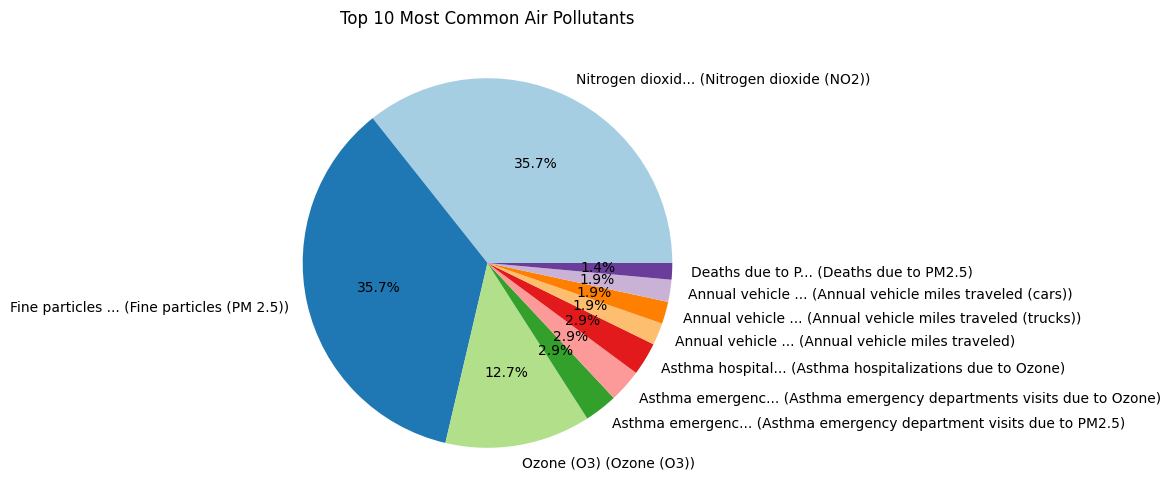

In [28]:
plot_top_pollutants(path)

In [29]:
def get_monthly_trends(data):
    """
    Calculate monthly average pollutant levels.

    Parameters:
    data (DataFrame): The input DataFrame containing air pollutant data.

    Returns:
    DataFrame: A DataFrame containing monthly average pollutant levels.
    """
    data['Month'] = data['Start_Date'].dt.to_period('M')
    monthly_trends = data.groupby('Month')['Data Value'].mean().reset_index()
    monthly_trends['Month'] = monthly_trends['Month'].dt.to_timestamp()
    return monthly_trends

In [30]:
get_monthly_trends(data=data)

,Month,Data Value
0,2005-01-01,41.013712
1,2008-12-01,20.284752
2,2009-01-01,41.389583
3,2009-06-01,21.244681
4,2009-12-01,17.812057
5,2010-01-01,48.056698
6,2010-06-01,21.691962
7,2010-12-01,19.545035
8,2011-01-01,1.897196
9,2011-06-01,21.173522


In [31]:
def plot_monthly_trends(data_path):
    """
    Plot monthly average pollutant levels.

    Parameters:
    data_path (str): The file path to the input CSV file containing air pollutant data.
    """
    data = get_clean_data(data_path)
    monthly_trends = get_monthly_trends(data)

    plt.figure(figsize=(12, 8))
    plt.plot(monthly_trends['Month'], monthly_trends['Data Value'], marker='o')
    plt.title('Monthly Average Pollutant Levels')
    plt.xlabel('Month')
    plt.ylabel('Average Pollutant Level')
    plt.grid(True, linestyle='--', linewidth=0.5)
    
    plt.xticks(ticks=monthly_trends['Month'], labels=monthly_trends['Month'].dt.strftime('%Y-%m'), rotation=45)

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()


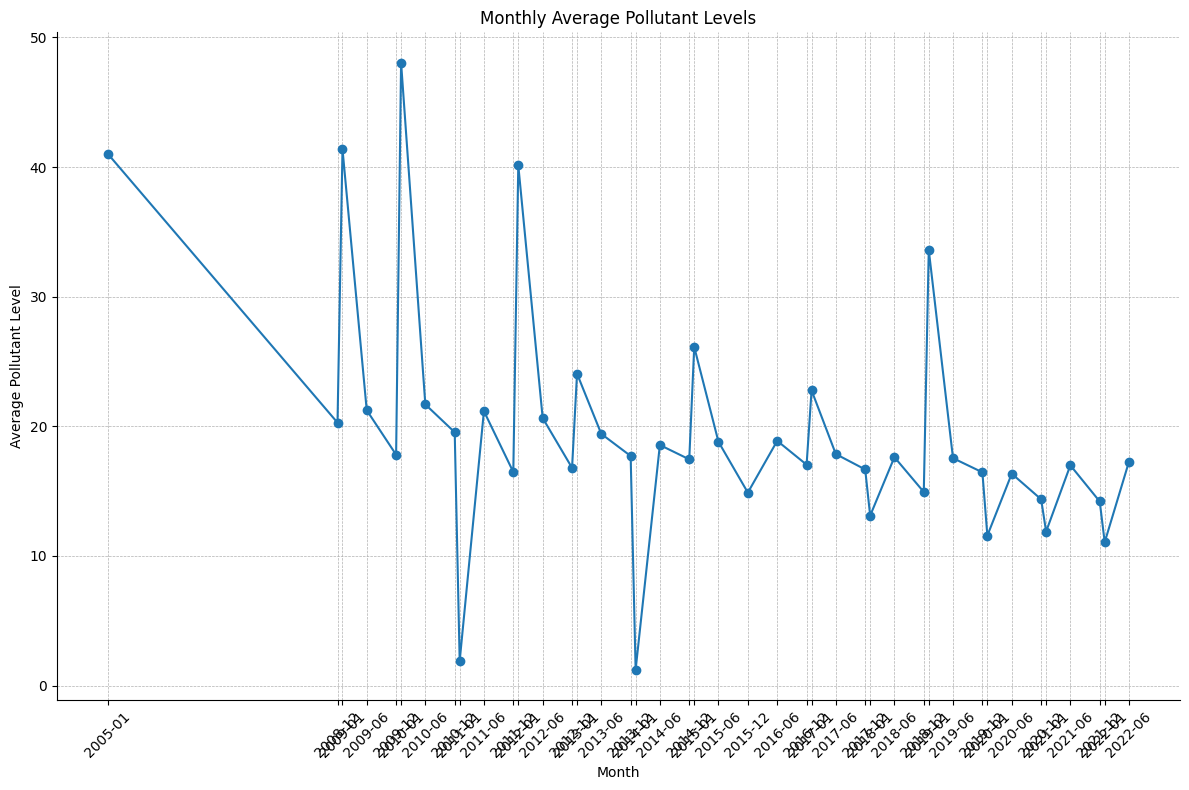

In [32]:
plot_monthly_trends(path)

In [33]:
def get_yearly_trends(data):
    """
    Calculate yearly average pollutant levels.

    Parameters:
    data (DataFrame): The input DataFrame containing air pollutant data.

    Returns:
    DataFrame: A DataFrame containing yearly average pollutant levels.
    """
    data['Year'] = data['Start_Date'].dt.year
    yearly_trends = data.groupby('Year')['Data Value'].mean().reset_index()
    return yearly_trends

In [34]:
get_yearly_trends(data=data)

,Year,Data Value
0,2005,41.013712
1,2008,20.284752
2,2009,26.054104
3,2010,27.236468
4,2011,15.532723
5,2012,25.545331
6,2013,19.161096
7,2014,16.094257
8,2015,21.143423
9,2016,18.145957


In [35]:
def plot_yearly_trends(data_path):
    """
    Plot yearly average pollutant levels.

    Parameters:
    data_path (str): The file path to the input CSV file containing air pollutant data.
    """
    data = get_clean_data(data_path)
    yearly_trends = get_yearly_trends(data)
    print(yearly_trends['Year'])


    plt.figure(figsize=(10, 6))
    plt.plot(yearly_trends['Year'], yearly_trends['Data Value'], marker='o')
    plt.title('Yearly Average Pollutant Levels')
    plt.xlabel('Year')
    plt.ylabel('Average Pollutant Level')
    plt.grid(True)
    plt.show()


0     2005
1     2008
2     2009
3     2010
4     2011
5     2012
6     2013
7     2014
8     2015
9     2016
10    2017
11    2018
12    2019
13    2020
14    2021
15    2022
Name: Year, dtype: int32


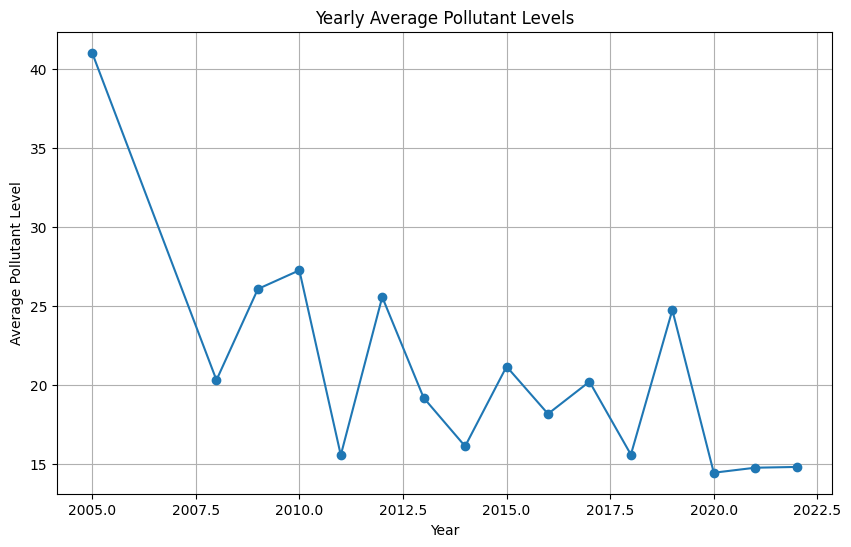

In [36]:
plot_yearly_trends(path)

In [37]:
def get_seasonal_trends(data):
    """
    Calculate seasonal average pollutant levels.

    Parameters:
    data (DataFrame): The input DataFrame containing air pollutant data.

    Returns:
    DataFrame: A DataFrame containing seasonal average pollutant levels.
    """
    data['Month'] = data['Start_Date'].dt.month
    data['Season'] = data['Month'].apply(lambda x: (x%12 + 3)//3)
    season_labels = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
    data['Season'] = data['Season'].map(season_labels)
    seasonal_trends = data.groupby('Season')['Data Value'].mean().reset_index()
    return seasonal_trends

In [38]:
get_seasonal_trends(data=data)

,Season,Data Value
0,Summer,18.917368
1,Winter,22.678390


In [39]:
def plot_seasonal_trends(data_path):
    """
    Plot seasonal average pollutant levels.

    Parameters:
    data_path (str): The file path to the input CSV file containing air pollutant data.
    """
    data = get_clean_data(data_path)
    seasonal_trends = get_seasonal_trends(data)

    plt.figure(figsize=(10, 6))
    plt.bar(seasonal_trends['Season'], seasonal_trends['Data Value'], color=['blue', 'green', 'red', 'orange'])
    plt.title('Seasonal Average Pollutant Levels')
    plt.xlabel('Season')
    plt.ylabel('Average Pollutant Level')
    plt.show()

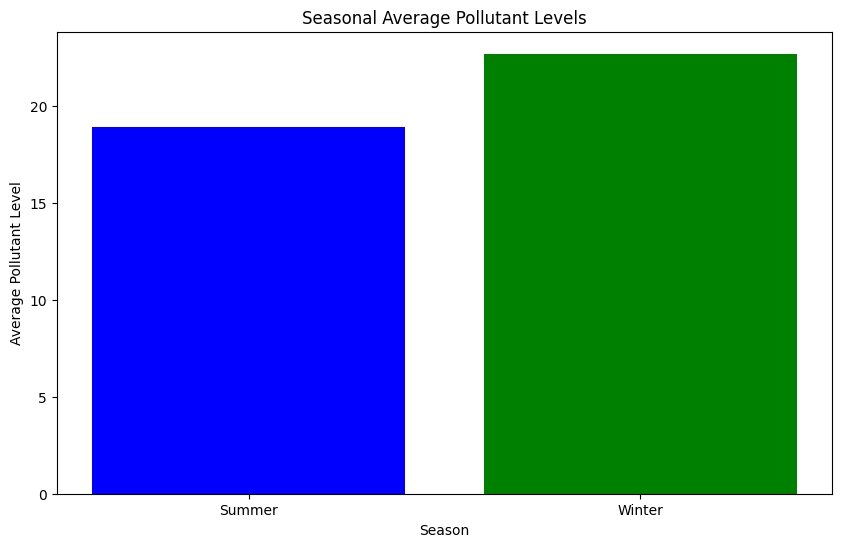

In [40]:
plot_seasonal_trends(path)

In [41]:
def get_pollutant_distribution_by_region(data):
    """
    Calculate the average pollutant levels for each region.

    Parameters:
    data (DataFrame): The input DataFrame containing air pollutant data.

    Returns:
    DataFrame: A DataFrame with columns 'Geo Place Name' and 'Data Value' for average pollutant levels.
    """
    region_trends = data.groupby('Geo Place Name')['Data Value'].mean().reset_index()
    region_trends = region_trends.sort_values(by='Data Value', ascending=False)
    return region_trends


In [42]:
get_pollutant_distribution_by_region(data=data)

,Geo Place Name,Data Value
47,High Bridge - Morrisania,38.978235
50,Hunts Point - Mott Haven,37.553529
23,Crotona -Tremont,36.990588
28,East Harlem,34.569517
17,Central Harlem - Morningside Heights,33.370632
...,...,...
85,South Beach and Willowbrook (CD2),14.286364
90,Southern SI,13.852525
81,Rockaway and Broad Channel (CD14),13.537273
84,South Beach - Tottenville,13.113529


In [43]:
def plot_pollutant_distribution_by_region(data_path, n=10):
    """
    Plot the distribution of pollutants across different geographical areas.

    Parameters:
    data_path (str): The file path to the input CSV file containing air pollutant data.
    n (int): The number of top regions to display.
    """
    data = get_clean_data(data_path)
    region_trends = get_pollutant_distribution_by_region(data)[:n]
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Data Value', y='Geo Place Name', data=region_trends, palette='viridis', hue='Geo Place Name', dodge=False, legend=False)
    plt.title('Average Pollutant Levels by Region')
    plt.xlabel('Average Pollutant Level')
    plt.ylabel('Region')
    plt.grid(True, linestyle='--', linewidth=0.5)
    
    plt.tight_layout()
    plt.show()

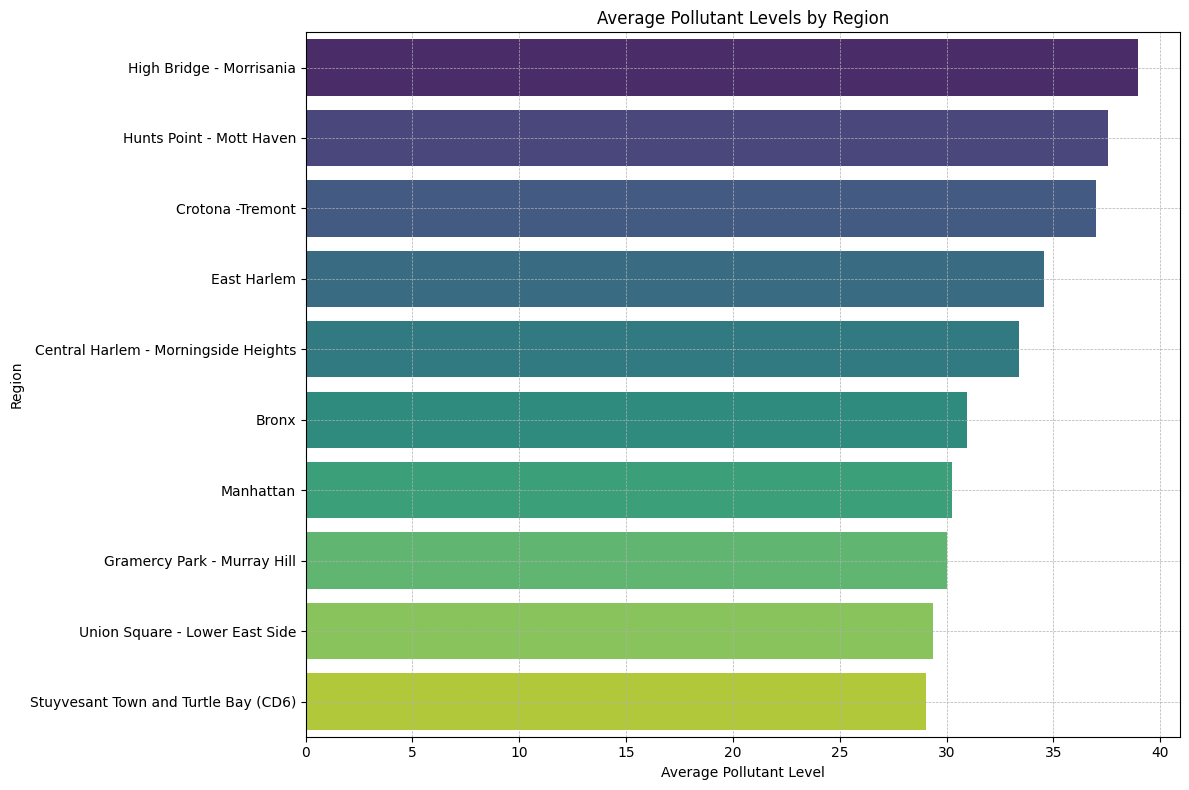

In [44]:
plot_pollutant_distribution_by_region(data_path=path)

In [45]:
def add_geo_coordinates(data, geo_coordinates):
    """
    Add geographical coordinates to the dataset based on Geo Place Name.

    Parameters:
    data (DataFrame): The input DataFrame containing air pollutant data.
    geo_coordinates (dict): A dictionary mapping Geo Place Name to coordinates.

    Returns:
    DataFrame: DataFrame with latitude and longitude columns added.
    """
    data['Latitude'] = data['Geo Place Name'].map(lambda x: geo_coordinates.get(x, {}).get('lat', None))
    data['Longitude'] = data['Geo Place Name'].map(lambda x: geo_coordinates.get(x, {}).get('lon', None))
    return data.dropna(subset=['Latitude', 'Longitude'])

In [46]:
geo_coordinates = {
    'Southeast Queens': {'lat': 40.676, 'lon': -73.756},
    'Bensonhurst - Bay Ridge': {'lat': 40.611, 'lon': -74.011},
    'Rockaways': {'lat': 40.586, 'lon': -73.811},
    'Coney Island - Sheepshead Bay': {'lat': 40.583, 'lon': -73.944},
}
add_geo_coordinates(data=data, geo_coordinates=geo_coordinates)


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Month,Year,Season,Latitude,Longitude
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,2015-01-01,0.3,1,2015,Winter,40.676,-73.756
1,179785,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,209.0,Bensonhurst - Bay Ridge,2015,2015-01-01,1.2,1,2015,Winter,40.611,-74.011
2,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2012,2011-12-01,8.6,12,2011,Winter,40.611,-74.011
3,178561,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Annual Average 2012,2011-12-01,8.0,12,2011,Winter,40.676,-73.756
4,823217,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Summer 2022,2022-06-01,6.1,6,2022,Summer,40.676,-73.756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17311,151707,644,Annual vehicle miles traveled (cars),Million miles,per square mile,UHF42,409.0,Southeast Queens,2005,2005-01-01,53.0,1,2005,Winter,40.676,-73.756
17312,151659,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,409.0,Southeast Queens,2005,2005-01-01,54.7,1,2005,Winter,40.676,-73.756
17379,602905,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,409.0,Southeast Queens,Winter 2017-18,2017-12-01,21.6,12,2017,Winter,40.676,-73.756
17380,825878,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,409.0,Southeast Queens,Annual Average 2022,2022-01-01,14.1,1,2022,Winter,40.676,-73.756


In [47]:
def plot_geographical_pollutant_heatmap(data_path, geo_coordinates):
    """
    Plot a heatmap to visualize pollutant concentrations geographically.

    Parameters:
    data_path (str): The file path to the input CSV file containing air pollutant data.
    geo_coordinates (dict): A dictionary mapping Geo Place Name to coordinates.
    """
    data = get_clean_data(data_path)
    data = add_geo_coordinates(data, geo_coordinates)

    plt.figure(figsize=(12, 8))
    heatmap_data = data.pivot_table(index='Latitude', columns='Longitude', values='Data Value', aggfunc='mean')
    sns.heatmap(heatmap_data, cmap='viridis', annot=True)
    plt.title('Geographical Heatmap of Pollutant Concentrations')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    plt.tight_layout()
    plt.show()

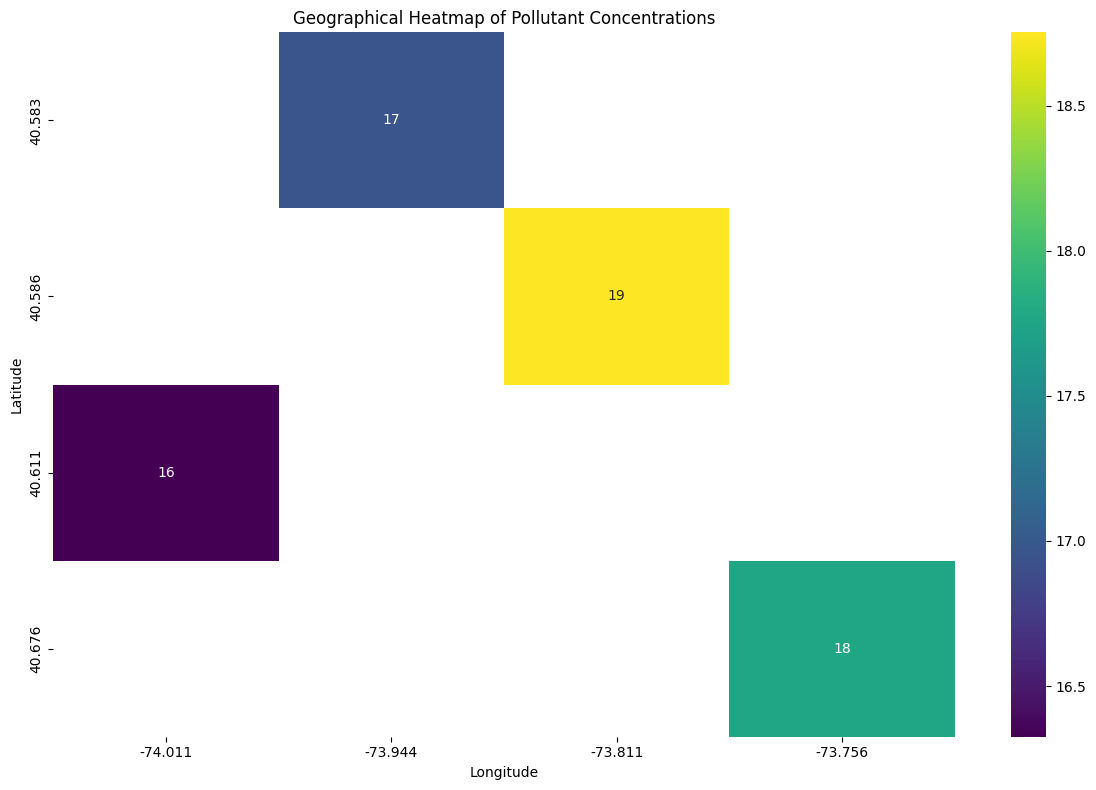

In [48]:
plot_geographical_pollutant_heatmap(path, geo_coordinates=geo_coordinates)